# Model Representation

With supervised learning, we are given the "right answer" for each example in the data. 

Notation we are going to use:
- $m = $ Number of training examples
- $x = $ input variable or features
- $y = $ output variable, target variable
- $(x,y)$ denotes one training example (a single row in the table)
- $(x^{(i)},y^{(i)})$ is the ith training example
    - so $x^{(1)} = 2104$
- $X$ is the set of input values
- $Y$ is the set of output values

In [2]:
from IPython.display import Image

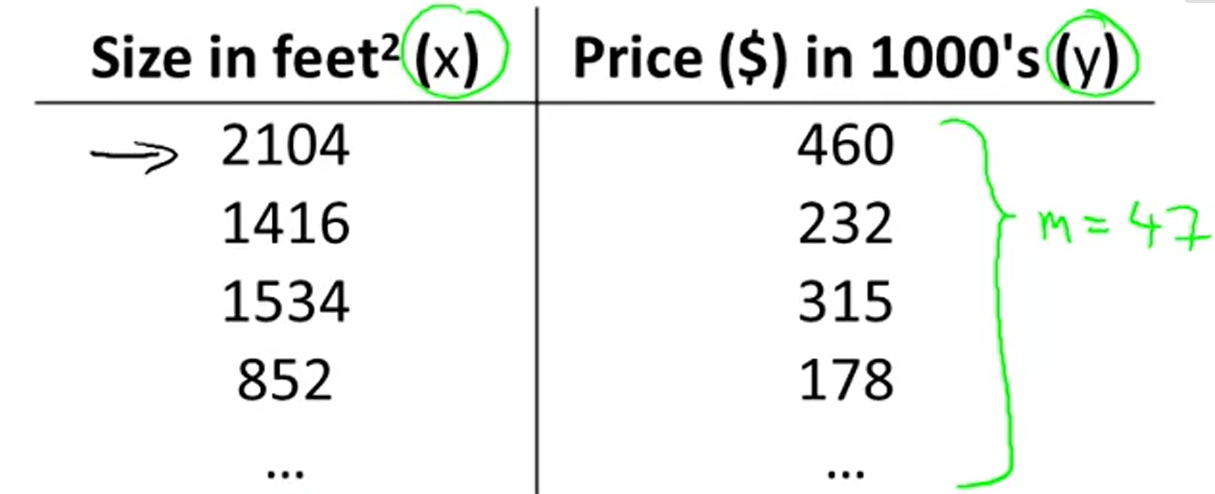

In [3]:
Image(filename='trainingset_housing_prices.PNG')

Here is how a supervised learning algorithms works:
- We start with a training set
- Feed it to the learning algorithm
- The learning algorithm outputs a function (h - hypothesis)
- The hypothesis takes in new input to predict a new output (estimated)

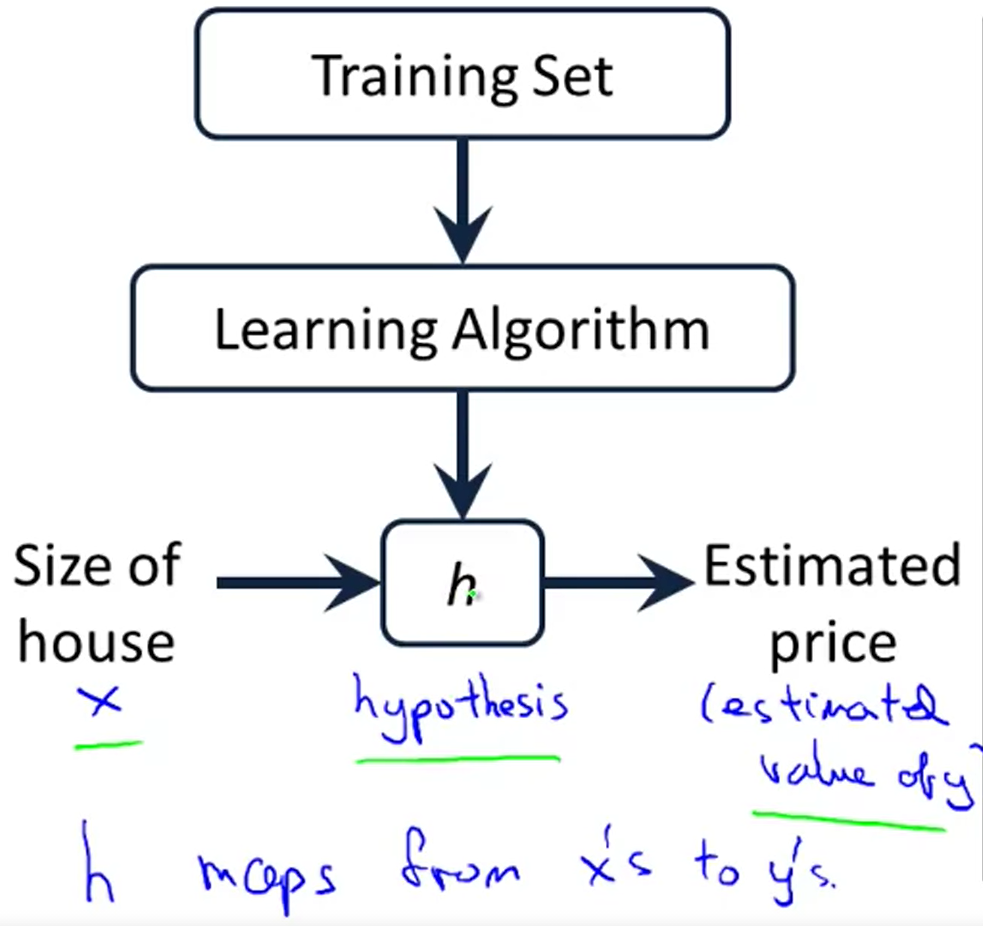

In [4]:
Image(filename='supervised_algorithm_steps.PNG')

How do we represent $h$?

<center>$h_{\theta}(x)=\theta_0 + \theta_1x$</center>

This equation and example of housing prices is called Linear Regression with one variable, or Univariate Linear Regression. 

# Cost Function

<center>$h_{\theta}(x)=\theta_0 + \theta_1x$</center>

The $\theta$'s are called parameters - how do we choose them? With different values we will get different plots and different hypotheses and different estimates on new data. 

We are going to choose $\theta_0$ and $\theta_1$ so that $h_\theta(x)$ is close to $y$ for our training examples $(x,y)$.

We want the difference between $h(x)$ and $y$ to be small. So we want to minimize: 

<center>$J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]^2$</center>

This function is also called the squared-error cost function. 

We are going to start with a simplified version where we assume that $\theta_0 = 0$

We want to understand our two main equations, $h(x)$ and $J(\theta)$. 

$h(x)$
- For a fixed $\theta_1$, this is a function of x

$J(\theta)$
- Function of $\theta_1$

Each value of $\theta_1$ is a different hypothesis

Our cost function with only $\theta_1$ had a bow like shape. Let's add back in $\theta_0$. This also has a bow shape as shown in the following figure.

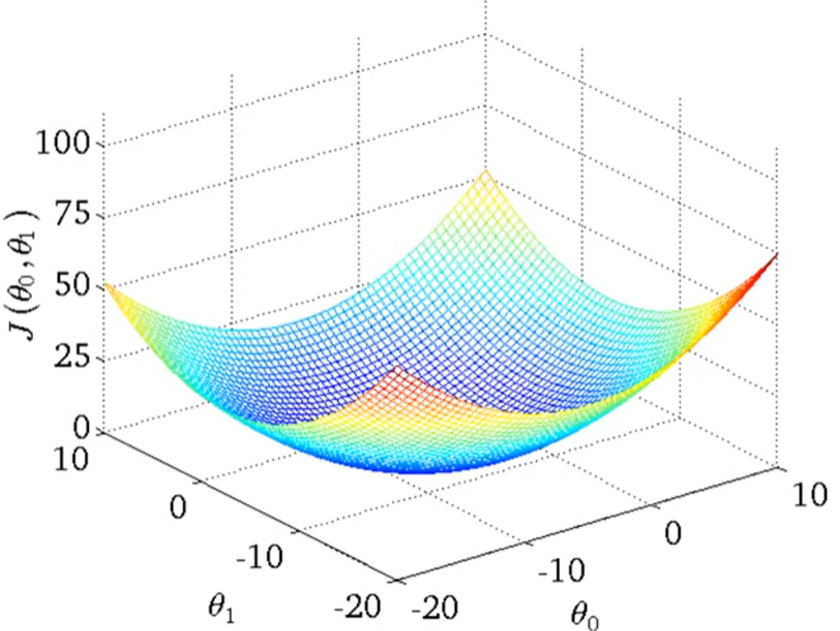

In [5]:
Image(filename='3d_cost_function.PNG')

We can use countour plots to look at these with our data. 

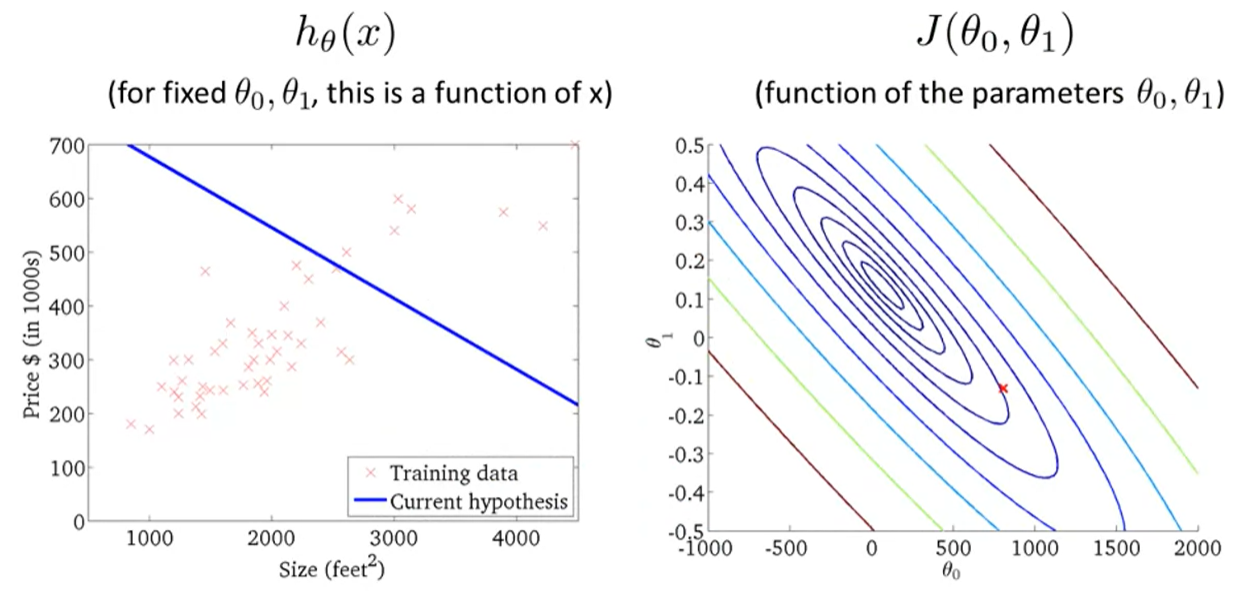

In [6]:
Image(filename='countour_cost_with_data.png')

In the countour plot, points on the same colored lines have the same value. Our goal is to get to the bottom of the bow. The red x corresponds to the $\theta_0$ and $\theta_1$ values that give the blue line on our data. 

# Parameter Learning

Going to use gradient descent to minimize J. 

There is a change that we end up at a local minimum and not a global one. 

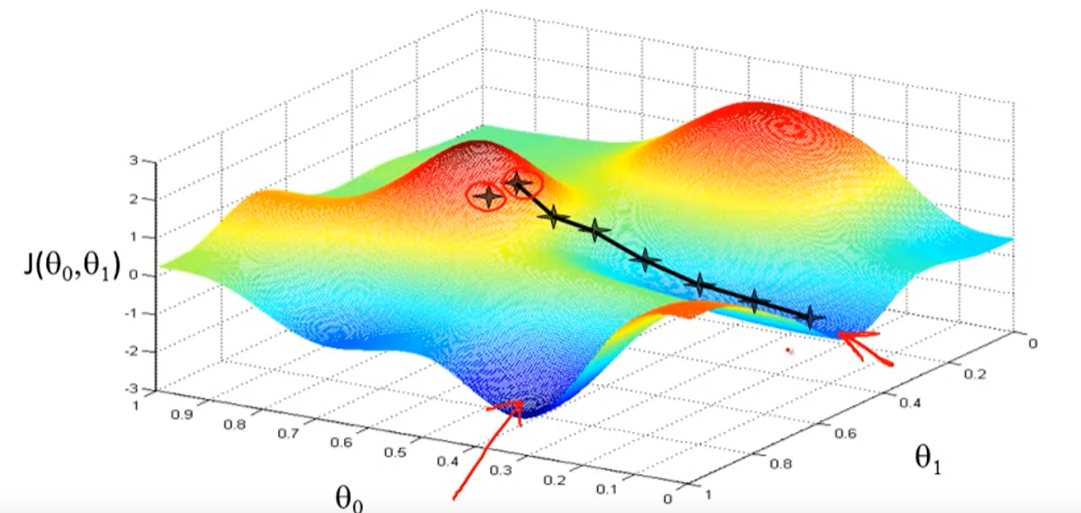

In [7]:
Image(filename='gradient_descent.png')

**Gradient Descent Algorithm**

Repeat until convergence:

<center>$\theta_j := \theta_j-\alpha \frac{\partial}{\partial \theta_j} J(\theta_0 , \theta_1)$</center>

for j=0 and j=1

Correct simultaneous update:

$temp0 := \theta_0-\alpha \frac{\partial}{\partial \theta_0} J(\theta_0 , \theta_1)$

$temp1 := \theta_1-\alpha \frac{\partial}{\partial \theta_1} J(\theta_0 , \theta_1)$

$\theta_0 := temp0$

$\theta_1 := temp1$

Alpha is the learning rate and controls how big of steps we take. 

Let's see how to handle the partial derivative. We will start with just $J(\theta_1)$. 

Of course a derivative is just the slope of a line at a point. 

If the derivative is positive, we are going to decrease theta. If the slope is negative, we are going to increase theta. 

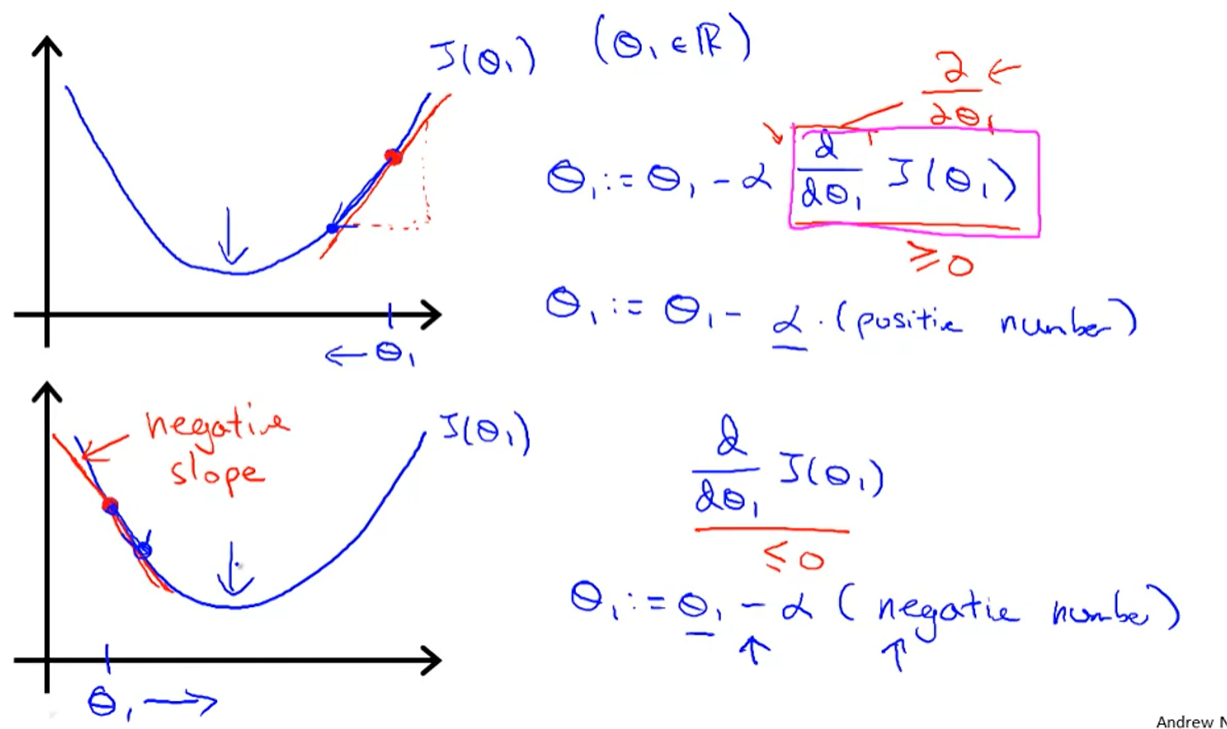

In [8]:
Image(filename='derivative.png')

With the learning rate, if alpha is too small, the algorithm may take a really long time to find a solution. If the learning rate is too large, we may overshoot the answer and may fail to converge. 

As we approach a local minimum, gradient descent will automatically take smaller steps, so there is no need to decrease alpha over time. 

Now let's apply gradient descent to minimize our linear regression model. 

$\frac{\partial}{\partial \theta_j} J(\theta_0 , \theta_1) = \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]^2 = \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i=1}^m [\theta_0 + \theta_1x^{(i)} - y^{(i)}]^2$



We need to find what the partial derivative is for j=0 and j=1. 

$j=0: \; \frac{\partial}{\partial \theta_0} J(\theta_0 , \theta_1) = \frac{1}{m}\sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]$

$j=1: \; \frac{\partial}{\partial \theta_1} J(\theta_0 , \theta_1) = \frac{1}{m}\sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]x^{(i)}$

Our gradient descent algorithm is:

Repeat until convergence:

$\theta_0 := \theta_0-\alpha \frac{1}{m}\sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]$

$\theta_1 := \theta_1-\alpha \frac{1}{m}\sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]x^{(i)}$